In [1]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
import stanford_mir; stanford_mir.init()

[&larr; Back to Index](index.html)

# Zero Crossing Rate

The [zero crossing rate](https://en.wikipedia.org/wiki/Zero-crossing_rate) indicates the number of times that a signal crosses the horizontal axis.

Let's load a signal:

In [2]:
x, sr = librosa.load('audio/simple_loop.wav')

Listen to the signal:

In [3]:
ipd.Audio(x, rate=sr)

Plot the signal:

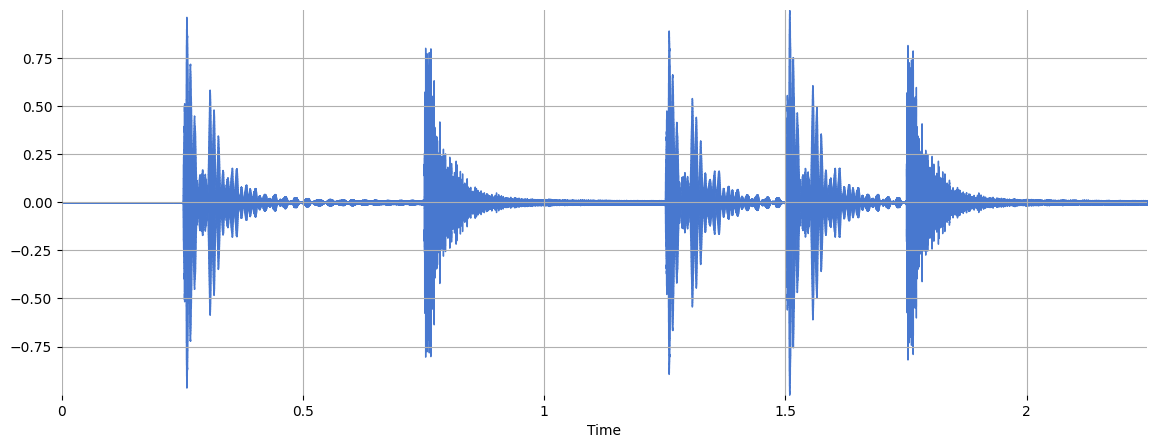

In [4]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr);

Let's zoom in:

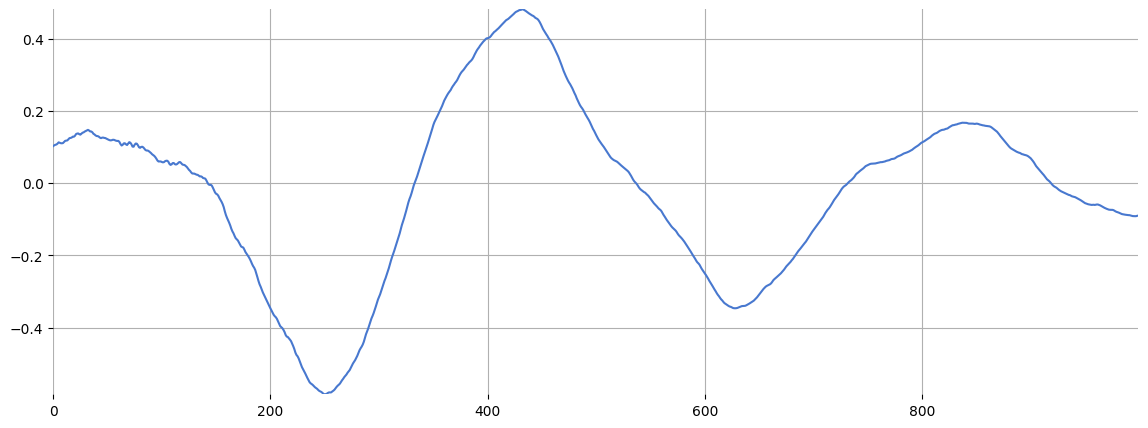

In [5]:
n0 = 6500
n1 = 7500
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1]);

I count five zero crossings. Let's compute the zero crossings using librosa.

In [6]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)

In [7]:
zero_crossings.shape

(1000,)

That computed a binary mask where `True` indicates the presence of a zero crossing. To find the total number of zero crossings, use `sum`:

In [8]:
print(sum(zero_crossings))

5


To find the *zero-crossing rate* over time, use `zero_crossing_rate`:

In [9]:
zcrs = librosa.feature.zero_crossing_rate(x)
print(zcrs.shape)

(1, 97)


Plot the zero-crossing rate:

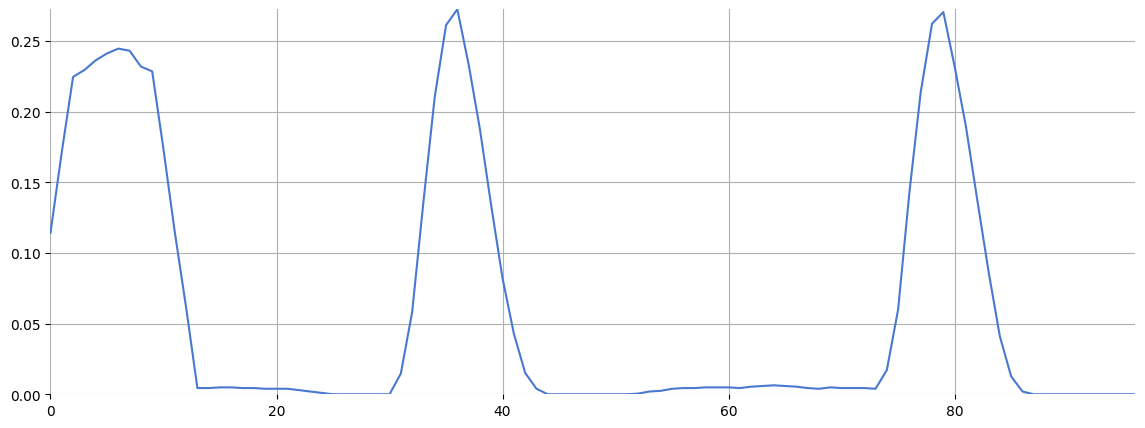

In [10]:
plt.figure(figsize=(14, 5))
plt.plot(zcrs[0]);

Note how the high zero-crossing rate corresponds to the presence of the snare drum.

The reason for the high rate near the beginning is because the silence oscillates quietly around zero:

(-0.0001, 0.0001)

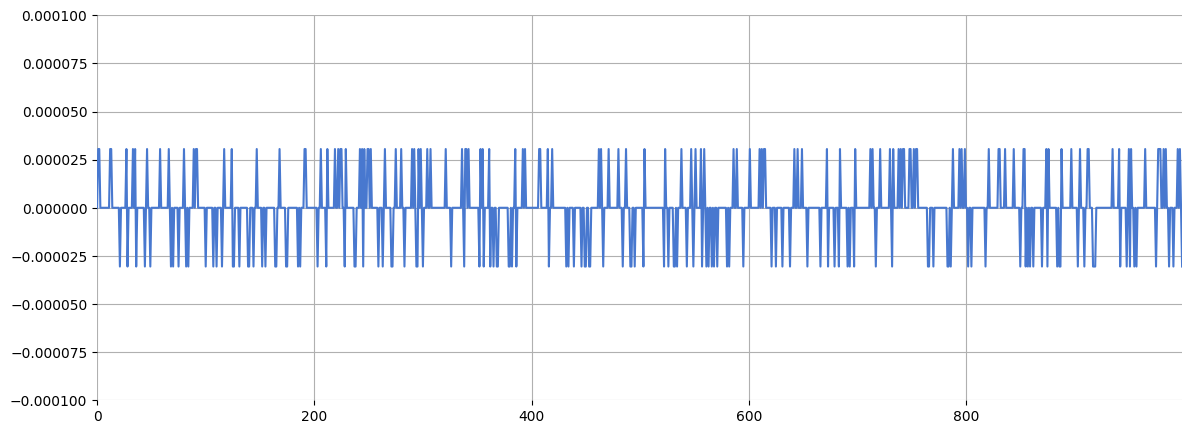

In [11]:
plt.figure(figsize=(14, 5))
plt.plot(x[:1000])
plt.ylim(-0.0001, 0.0001)

A simple hack around this is to add a small constant before computing the zero crossing rate:

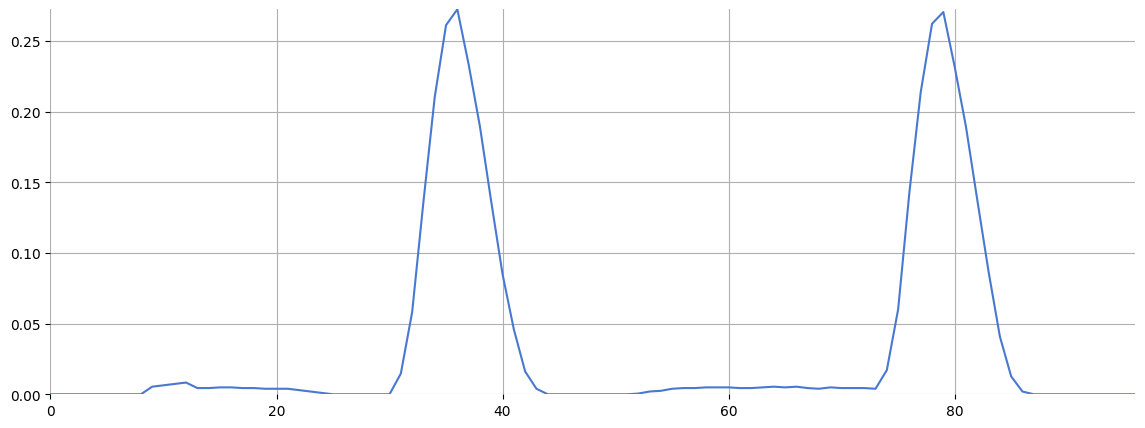

In [12]:
zcrs = librosa.feature.zero_crossing_rate(x + 0.0001)
plt.figure(figsize=(14, 5))
plt.plot(zcrs[0]);

## Questions

Try for other audio files. Does the zero-crossing rate still return something useful in polyphonic mixtures?

In [13]:
ls audio

125_bounce.wav                  jangle_pop.mp3
58bpm.wav                       latin_groove.mp3
README.md                       oboe_c6.wav
brahms_hungarian_dance_5.mp3    prelude_cmaj.wav
busta_rhymes_hits_for_days.mp3  simple_loop.wav
c_strum.wav                     simple_piano.wav
clarinet_c6.wav                 sir_duke_piano_fast.mp3
classic_rock_beat.mp3           sir_duke_piano_slow.mp3
classic_rock_beat.wav           sir_duke_trumpet_fast.mp3
conga_groove.wav                sir_duke_trumpet_slow.mp3
cowbell.wav                     thx_original.mp3
drum_samples/                   tone_440.wav
funk_groove.mp3


[&larr; Back to Index](index.html)